In [35]:
"""
Exp05A: Transaction cost sensitivity

Goal:
- Test how transaction costs erode performance and identify the break-even cost level.

Fixed:
- Asset: SPY
- Execution: next-bar
- Risk: none (vol_targeting / risk-off gate: off)
- regime

Sweep: Transaction cost: cost_rate = [0.0, 0.0001, 0.0002, 0.0005, 0.001, 0.002, 0.005, 0.01]
- realistic: 0 / 1 / 2 / 5 bps
- moderate: 10 / 20 bps
- stress: 50 / 100 bps

"""

'\nExp05A: Transaction cost sensitivity\n\nGoal:\n- Test how transaction costs erode performance and identify the break-even cost level.\n\nFixed:\n- Asset: SPY\n- Execution: next-bar\n- Risk: none (vol_targeting / risk-off gate: off)\n- regime\n\nSweep: Transaction cost: cost_rate = [0.0, 0.0001, 0.0002, 0.0005, 0.001, 0.002, 0.005, 0.01]\n- realistic: 0 / 1 / 2 / 5 bps\n- moderate: 10 / 20 bps\n- stress: 50 / 100 bps\n\n'

In [36]:
import os
os.chdir("/Users/kim/Desktop/Quant-Research")
print(os.getcwd())

# os.chdir("..")
# print(os.getcwd())

/Users/kim/Desktop/Quant-Research


In [37]:
import pandas as pd

from config import Config
from runner import run

In [38]:
# Sweep: transaction cost(cost_rate)
from copy import deepcopy
from dataclasses import replace
from config import Config

 
cfg = replace(Config(), MA_WINDOW=80) # baseline config
print(cfg)


cost_rate = [0.0, 0.0001, 0.0002, 0.0005, 0.001, 0.002, 0.005,0.01]
# realistic: 0 / 1 / 2 / 5 bps
# moderate: 10 / 20 bps
# stress: 50 / 100 bps


rows = []

for c in cost_rate:
    cfg_c = deepcopy(cfg)
    cfg_c = replace(cfg, COST_RATE=c)
    
    _, summary = run(cfg_c)
    summary["COST_RATE"] = c # dict
    rows.append(summary)

exp05a = pd.DataFrame(rows).sort_values("COST_RATE") # 汇总成一个 实验结果表（experiment table）

exp05a


Config(DATA_PATH='data/raw/SPY_2015_2025.csv', PRICE_COL='Close', MA_WINDOW=80, LONG_ONLY=True, RISK_MODE='none', VOL_LOOKBACK=20, TARGET_VOL_ANNUAL=0.15, MIN_SCALE=0.0, MAX_SCALE=1.0, USE_RISK_OFF_GATE=False, GATE_LOOKBACK=20, GATE_VOL_THRESHOLD_ANNUAL=0.3, COST_RATE=0.001, START=None, END=None)


/Users/kim/Desktop/Quant-Research/data/loaders.py:19: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv(path, index_col=0, parse_dates=True)
/Users/kim/Desktop/Quant-Research/data/loaders.py:22: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  idx = pd.to_datetime(df.index, errors="coerce")
/Users/kim/Desktop/Quant-Research/data/loaders.py:19: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv(path, index_col=0, parse_dates=True)
/Users/kim/Desktop/Quant-Research/data/loaders.py:22: UserWarning: Could not infer format, so each element will be parsed in

,Annual Return,Max Drawdown,Sharpe,Total Turnover,N_obs,COST_RATE
0,0.081822,-0.169437,0.765314,108.0,2436,0.0000
1,0.080603,-0.171760,0.755142,108.0,2436,0.0001
2,0.079386,-0.174077,0.744963,108.0,2436,0.0002
3,0.075741,-0.180989,0.714391,108.0,2436,0.0005
4,0.069690,-0.192385,0.663331,108.0,2436,0.0010
5,0.057683,-0.214722,0.560935,108.0,2436,0.0020
6,0.022393,-0.284311,0.253966,108.0,2436,0.0050
7,-0.034047,-0.444878,-0.241740,108.0,2436,0.0100


<Axes: title={'center': 'Exp05A | Sharpe vs COST_RATE'}, xlabel='COST_RATE'>

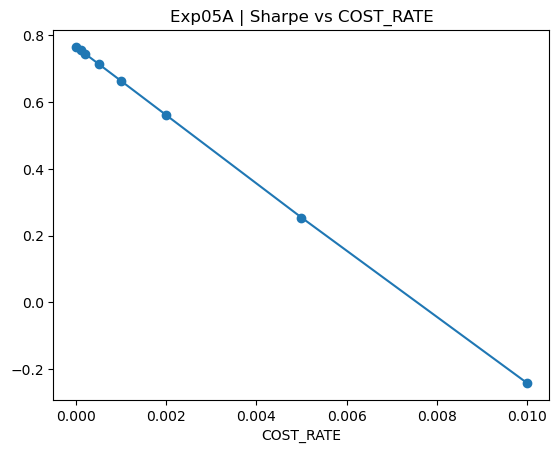

In [39]:
exp05a.set_index("COST_RATE")["Sharpe"].plot(
    marker="o", title="Exp05A | Sharpe vs COST_RATE"
)
# .set_index("COST_RATE")：把 COST_RATE 这一列 设为横轴（index）
# ["Sharpe"]： 只选取 Sharpe 这一列

<Axes: title={'center': 'Exp05A | Annual Return vs COST_RATE'}, xlabel='COST_RATE'>

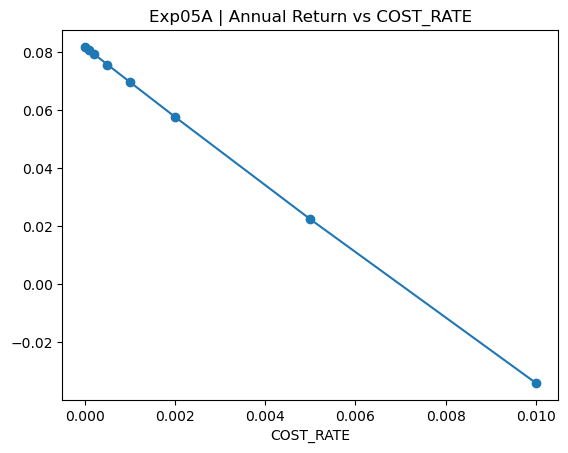

In [40]:
exp05a.set_index("COST_RATE")["Annual Return"].plot(
    marker="o", title="Exp05A | Annual Return vs COST_RATE"
)

<Axes: title={'center': 'Exp05A | Turnover vs COST_RATE'}, xlabel='COST_RATE'>

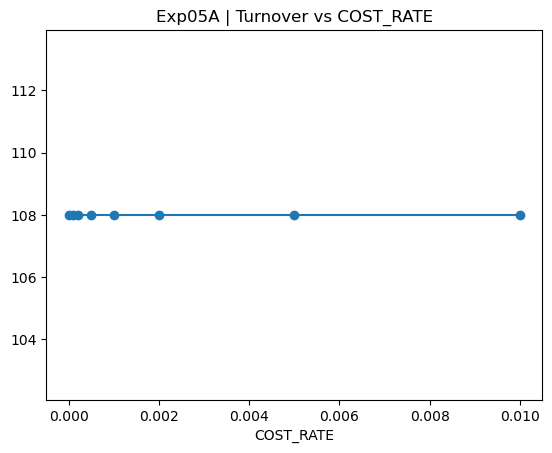

In [41]:
exp05a.set_index("COST_RATE")["Total Turnover"].plot(
    marker="o", title="Exp05A | Turnover vs COST_RATE"
)